In [199]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch.optim as optim
from torchvision.datasets import MNIST
import torch.nn as nn
import numpy as np

In [180]:
class Quadratic(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.W = nn.Parameter(torch.randn(in_features, in_features))
        self.V = nn.Parameter(torch.zeros(in_features, out_features))
        self.a = nn.Parameter(torch.randn(in_features))
        self.b = nn.Parameter(torch.randn(out_features))

    def forward(self, X):
        return ((X @ self.W + self.a) * X) @ self.V + self.b 

        """
        x1 + x2 + x3 + x1 x1 + x1 x2 + x1 x3 + x2 x2 + x2 x3 + 

        [x1, x2, x3] * [x1, x2, x3] = x1*x1 + x2*x2 + x3*x3

                        1 0 0              
        x1, x2, x3 @    0 1 0     =   x1 x2 x3, 
                        0 0 1
        """
        



In [153]:
test = Quadratic(2, 10)
X = torch.rand(2)
print(X)
Y = test.forward(X)
print(Y)

tensor([0.1019, 0.5213])
tensor([-0.5282,  1.1606,  0.7398,  0.4755, -0.4698,  0.5464, -0.7789, -0.0791,
        -0.4000,  0.4158], grad_fn=<AddBackward0>)


In [129]:
class MyLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_features, out_features))
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, input):
        return (input @ self.weight) + self.bias

In [177]:
train_dataset = MNIST("data", train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST("data", train=False, download=True, transform=transforms.ToTensor())
train_data = DataLoader(
  dataset=train_dataset,
  batch_size=32,
)

Training epoch 1.


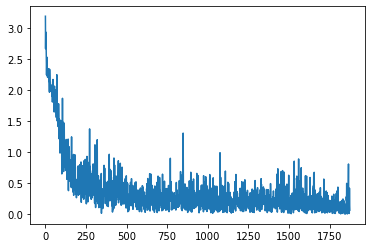

Training epoch 2.


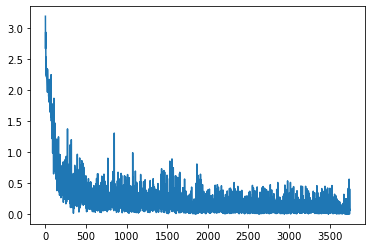

In [221]:
quadratic_model = nn.Sequential(
  Quadratic(28 * 28, 512),
  nn.ReLU(),
  Quadratic(512, 128),
  nn.ReLU(),
  Quadratic(128, 10)
)

linear_model = nn.Sequential(
  nn.Linear(28 * 28, 512 * 2),
  nn.ReLU(),
  nn.Linear(512 * 2 , 128 * 2),
  nn.ReLU(),
  nn.Linear(128 * 2, 10)
)

model = quadratic_model
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criteria = nn.CrossEntropyLoss()

loss_history = []

num_epochs = 2
for epoch in range(1, num_epochs + 1):
    print(f"Training epoch {epoch}.")
  
    #tqdm_train_data = tqdm(train_data)
    for (images, labels) in train_data:
        images = images.reshape(-1, 28 * 28)
        optimizer.zero_grad()
        pred = model(images)

        #print(pred.shape, pred)

        #raise Exception("Hello world")
        loss = criteria(pred, labels)
        
        #print(loss.item())

        loss.backward()
        #print(loss.item())
        loss_history.append(loss.item())
        #tqdm_train_data.set_description(f"Loss: {loss.item()}")

        optimizer.step()

    plt.plot(loss_history)
    plt.show()

In [222]:
num_correct = 0

for (image, label) in test_dataset:
  pred = model(image.reshape(1, 28 * 28))
  pred_label = F.log_softmax(pred, dim=-1).argmax().item()
  if pred_label == label:
    num_correct += 1

print(f"Accuracy: {num_correct / len(test_dataset) * 100}%")

Accuracy: 95.42%
